<a href="https://colab.research.google.com/github/SubhamZap/LSTM-Text-Classification/blob/main/Multi_class_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Tweets**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML contest/Multi class Text Classification/tweets.csv')
df.head()

,Unnamed: 0,Hastag,Tweet
0,0,#love,RT I wonder why you chose me among these flowe...
1,1,#love,Is any man called being circumcised let him no...
2,2,#love,RT mx wwmx love s Shape Of Love has surpassed ...
3,3,#love,Thank you foster carers amp fostering communit...
4,4,#love,RT 22 NFTGiveaway freenft Love Manifest Giveaw...


In [ ]:
df.columns

Index(['Unnamed: 0', 'Hastag', 'Tweet'], dtype='object')

In [ ]:
df.shape

(43988, 3)

In [ ]:
df.isna().sum()

Unnamed: 0    0
Hastag        0
Tweet         0
dtype: int64

In [ ]:
df.rename(columns = {'Hastag': 'category', 'Tweet': 'tweet'}, inplace = True)

In [ ]:
import re

for i in range(len(df)):
  df['category'].iloc[i] = ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",df['category'].iloc[i]))
  df['tweet'].iloc[i] = ''.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",df['tweet'].iloc[i]))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df.category.unique()

array(['love', 'confession', 'job', 'startup', 'Politics', 'Movie',
       'Game', 'Media', 'News', 'Technology', 'Finance'], dtype=object)

In [ ]:
df.category.value_counts()

love          5000
job           5000
startup       5000
Politics      5000
Movie         5000
Finance       5000
Media         3500
News          3500
Technology    3500
Game          3145
confession     343
Name: category, dtype: int64

# *Text Cleaning*

In [ ]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [ ]:
df['cleaned_tweet'] = df.tweet.apply(lambda x : clean_text(x))

In [ ]:
df.head()

,category,tweet,cleaned_tweet
0,love,RT I wonder why you chose me among these flowe...,rt wonder chose among flowers beautiful tree h...
1,love,Is any man called being circumcised let him no...,man called circumcised let become uncircumcise...
2,love,RT mx wwmx love s Shape Of Love has surpassed ...,rt wwm love shape love surpassed 345k copies s...
3,love,Thank you foster carers amp fostering communit...,thank foster carers amp fostering communities ...
4,love,RT 22 NFTGiveaway freenft Love Manifest Giveaw...,rt 22 nftgiveaway freenft love manifest giveaw...


In [ ]:
g = []
for i in df['cleaned_tweet']:
    g.append(i)

In [ ]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 266


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['cleaned_tweet'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 53458 unique tokens.


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['cleaned_tweet'].values)
X = pad_sequences(X, maxlen=1000)

In [ ]:
y = pd.get_dummies(df['category'],columns=df["category"]).values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print('shape of x_train:', x_train.shape)
print('shape of x_test:', x_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of x_train: (35190, 1000)
shape of x_test: (8798, 1000)
shape of y_train: (35190, 11)
shape of y_test: (8798, 11)


In [ ]:
print(x_train[4])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Embedding(50000,100,input_length=1000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 1000, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 11)                1111      
                                                                 
Total params: 5,081,511
Trainable params: 5,081,511
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
495/495 [==============================] - 1590s 3s/step - loss: 0.7186 - accuracy: 0.7919 - val_loss: 0.2764 - val_accuracy: 0.9139
Epoch 2/10
457/495 [==========================>...] - ETA: 1:52 - loss: 0.1684 - accuracy: 0.9492

In [ ]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

14/14 [==============================] - 16s 1s/step - loss: 0.5860 - accuracy: 0.8112
Test set
  Loss: 0.586
  Accuracy: 0.811


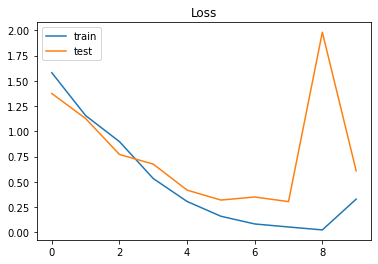

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [ ]:
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['love', 'confession', 'job', 'startup', 'Politics', 'Movie', 'Game', 'Media', 'News', 'Technology', 'Finance']
print(pred, labels[np.argmax(pred)])

[[0.05010699 0.19947001 0.0478189  0.60119545 0.10140869]] Sports


In [ ]:
new_complaint =['Additionally, the microsite on Amazon.in highlights some of the key features of the Mi 10. It shows that the phone will come with a 108-megapixel primary camera that will have optical image stabilisation (OIS) and 8K video recording. The microsite also claims that the Mi 10 will carry the worlds fastest wireless charging and include Qualcomm Snapdragon 865 SoC. You can also expect a 3D curved TrueColor E3 AMOLED display with a Corning Gorilla Glass protection on top and stereo speakers.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.45048156 0.06893049 0.29776222 0.07059077 0.11223494]] Business


In [ ]:
new_complaint = ['Having undergone a surgery for shoulder dislocation last month, young Australian pacer Jhye Richardson is hopeful of recovering from the recurring injury by the time cricketing action resumes. Cricket Australias chief medical officer Alex Kountouris sounded optimistic of the fast bowlers recovery process with respect to a comeback later this year.Its a lengthy surgery but it does give him an opportunity now that were not going to play until ... September, October, November or December ... hes obviously a chance with that, Kountouris told News Corp in an interaction.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.04430942 0.26696137 0.05008856 0.5306084  0.1080322 ]] Sports
